# 多元线性回归
### 数据探索
### 一、数据异常
#### 包含数据缺失和数据值异常  
#### 
##### 1、检查数据缺失         
##### 使用info和describe方法    
##### 
工具：    
pandas对象.info()方法及pandas对象.describe()方法    
如果：        
出现null，或数据的类型异常    
需要：    
丢掉缺失数据或对缺失数据进行填充    
操作1：    
丢掉缺失数据使用pandas.drop()方法，可以丢失行或者是列，行或列可以单个数值也可以是数组    
操作2：    
填充数据可以使用平均值、众数、中位数等，这些值可以在.describe()方法中直接看到       
##### 
##### 2、检查数据是否存在异常    
##### 使用箱型图
##### 
工具：   
plt.boxplot()使用箱型图    
如果：    
存在远离‘大部队’的点    
需要：    
将其进行删除    
操作1：    
同1.1    
##### 
##### 二、特征是否符合正态分布
##### 使用直方图和Q-Q图
##### 
1、直方图    
工具：    
seaborn.distplot()方法    
如果：    
出现与正态分布预测曲线偏差较大    
需要：    
对数据进行进一步处理    
##### 
2、Q-Q图    
工具：    
scipy.stats.probplot()方法    
如果：    
散点与回归线偏差较大    
需要：     
对数据进行进一步的处理    
##### 
##### 三、训练数据与测试数据特征分布是否一致
##### 使用KDE（核密度估计）图验证，KDE类似于平滑之后的直方图
##### 
1、KDE图    
工具：    
seaborn.kdeplot()    
如果：    
训练数据和测试数据的填充范围差别较大    
需要：    
将对应特征舍弃，以免对预测结果产生较大误差       
操作:    
同1.1drop操作    
##### 
##### 四、特征与目标之间的相关性
##### 包含特征与目标之间的回归关系，特征与目标之间的热力图
##### 
1、特征与目标的回归关系    
工具：     
saeborn.regplot()      
如果：    
散点与回归线重合程度比较低或不相关    
需要：     
对特征数据进行处理    
##### 
2、特征与目标的热力图       
工具：    
先使用pandas.corr()方法返回数据各列之间的相关值，再将值传入seaborn.heatmap()画图    
如果：    
有些特征与target的相关性为0-0.1之间    
需要：    
可以将对应特征剔除    

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

#### 1.1检查数据是否存在缺失

In [7]:
train_data = pd.read_csv('zhengqi_train.txt',sep='\t')
test_data = pd.read_csv('zhengqi_test.txt',sep='\t')
train_data.info()
test_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [8]:
test_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


#### 1.2检查数据值是否有异常

C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/3545754394.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


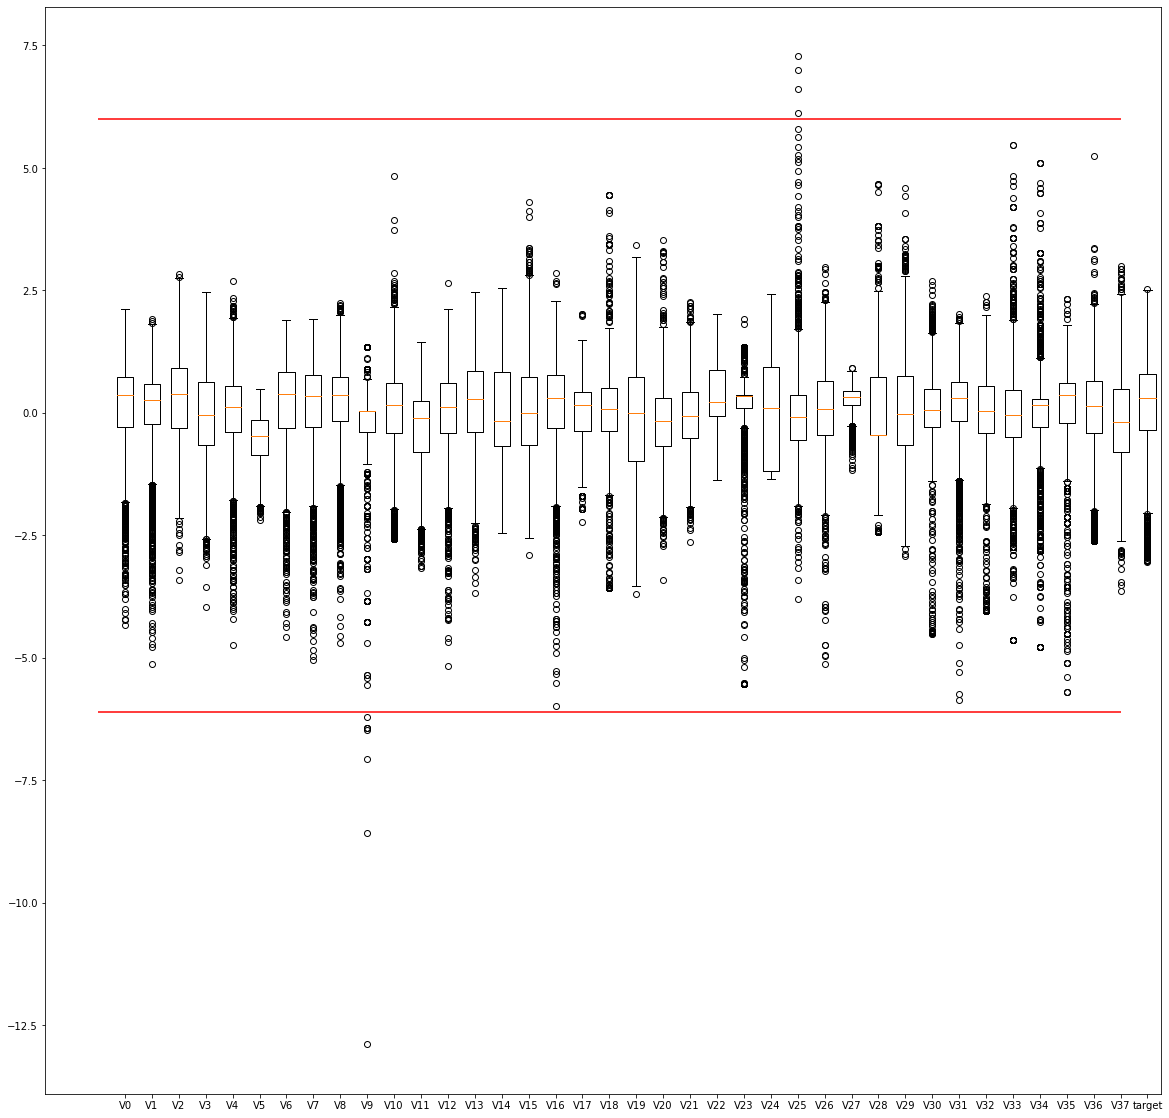

In [18]:
fig1 = plt.figure(figsize=(20,20))
plt.boxplot(train_data,widths=0.6,labels=train_data.columns)  #widths参数控制箱体的宽度
plt.hlines([6,-6.1],[0,0],[38,38],'r')    #.hlines()可以通过指定y,x起始值，x结束值绘制水平线，这三个参数都可以是数组
fig1.show()

#### 1.2将异常的数据从数据集中删除，再观察箱体图

(2876, 39)


C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/490904415.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


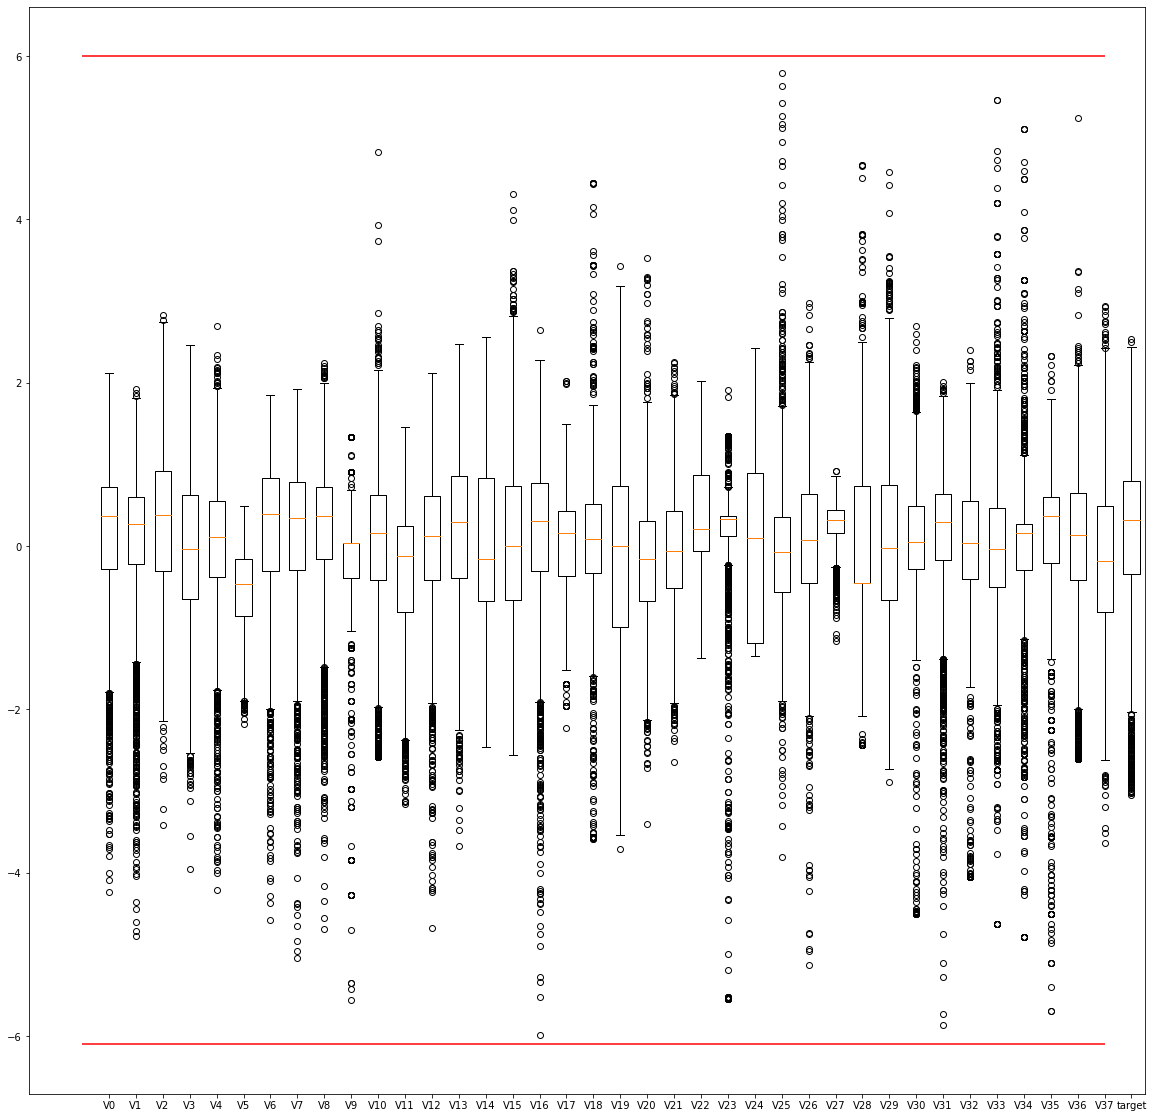

In [20]:
train_data_del_v9_lier= train_data[train_data['V9']>-6.1]
train_data_del_v9_v25_lier = train_data_del_v9_lier[train_data_del_v9_lier['V25']<6]
print(train_data_del_v9_v25_lier.shape)
fig2 = plt.figure(figsize=(20,20))
plt.boxplot(train_data_del_v9_v25_lier,widths=0.6,labels=train_data_del_v9_v25_lier.columns)  #widths参数控制箱体的宽度
plt.hlines([6,-6.1],[0,0],[38,38],'r')    #.hlines()可以通过指定y,x起始值，x结束值绘制水平线，这三个参数都可以是数组
fig2.show()

#### 2.1&2.2直方图和Q-Q图

C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/447173621.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train_data[f'V{i}'],fit=stats.norm)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/447173621.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train_data[f'V{i}'],fi

C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/447173621.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train_data[f'V{i}'],fit=stats.norm)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/447173621.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train_data[f'V{i}'],fi

C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/447173621.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train_data[f'V{i}'],fit=stats.norm)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/447173621.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train_data[f'V{i}'],fi

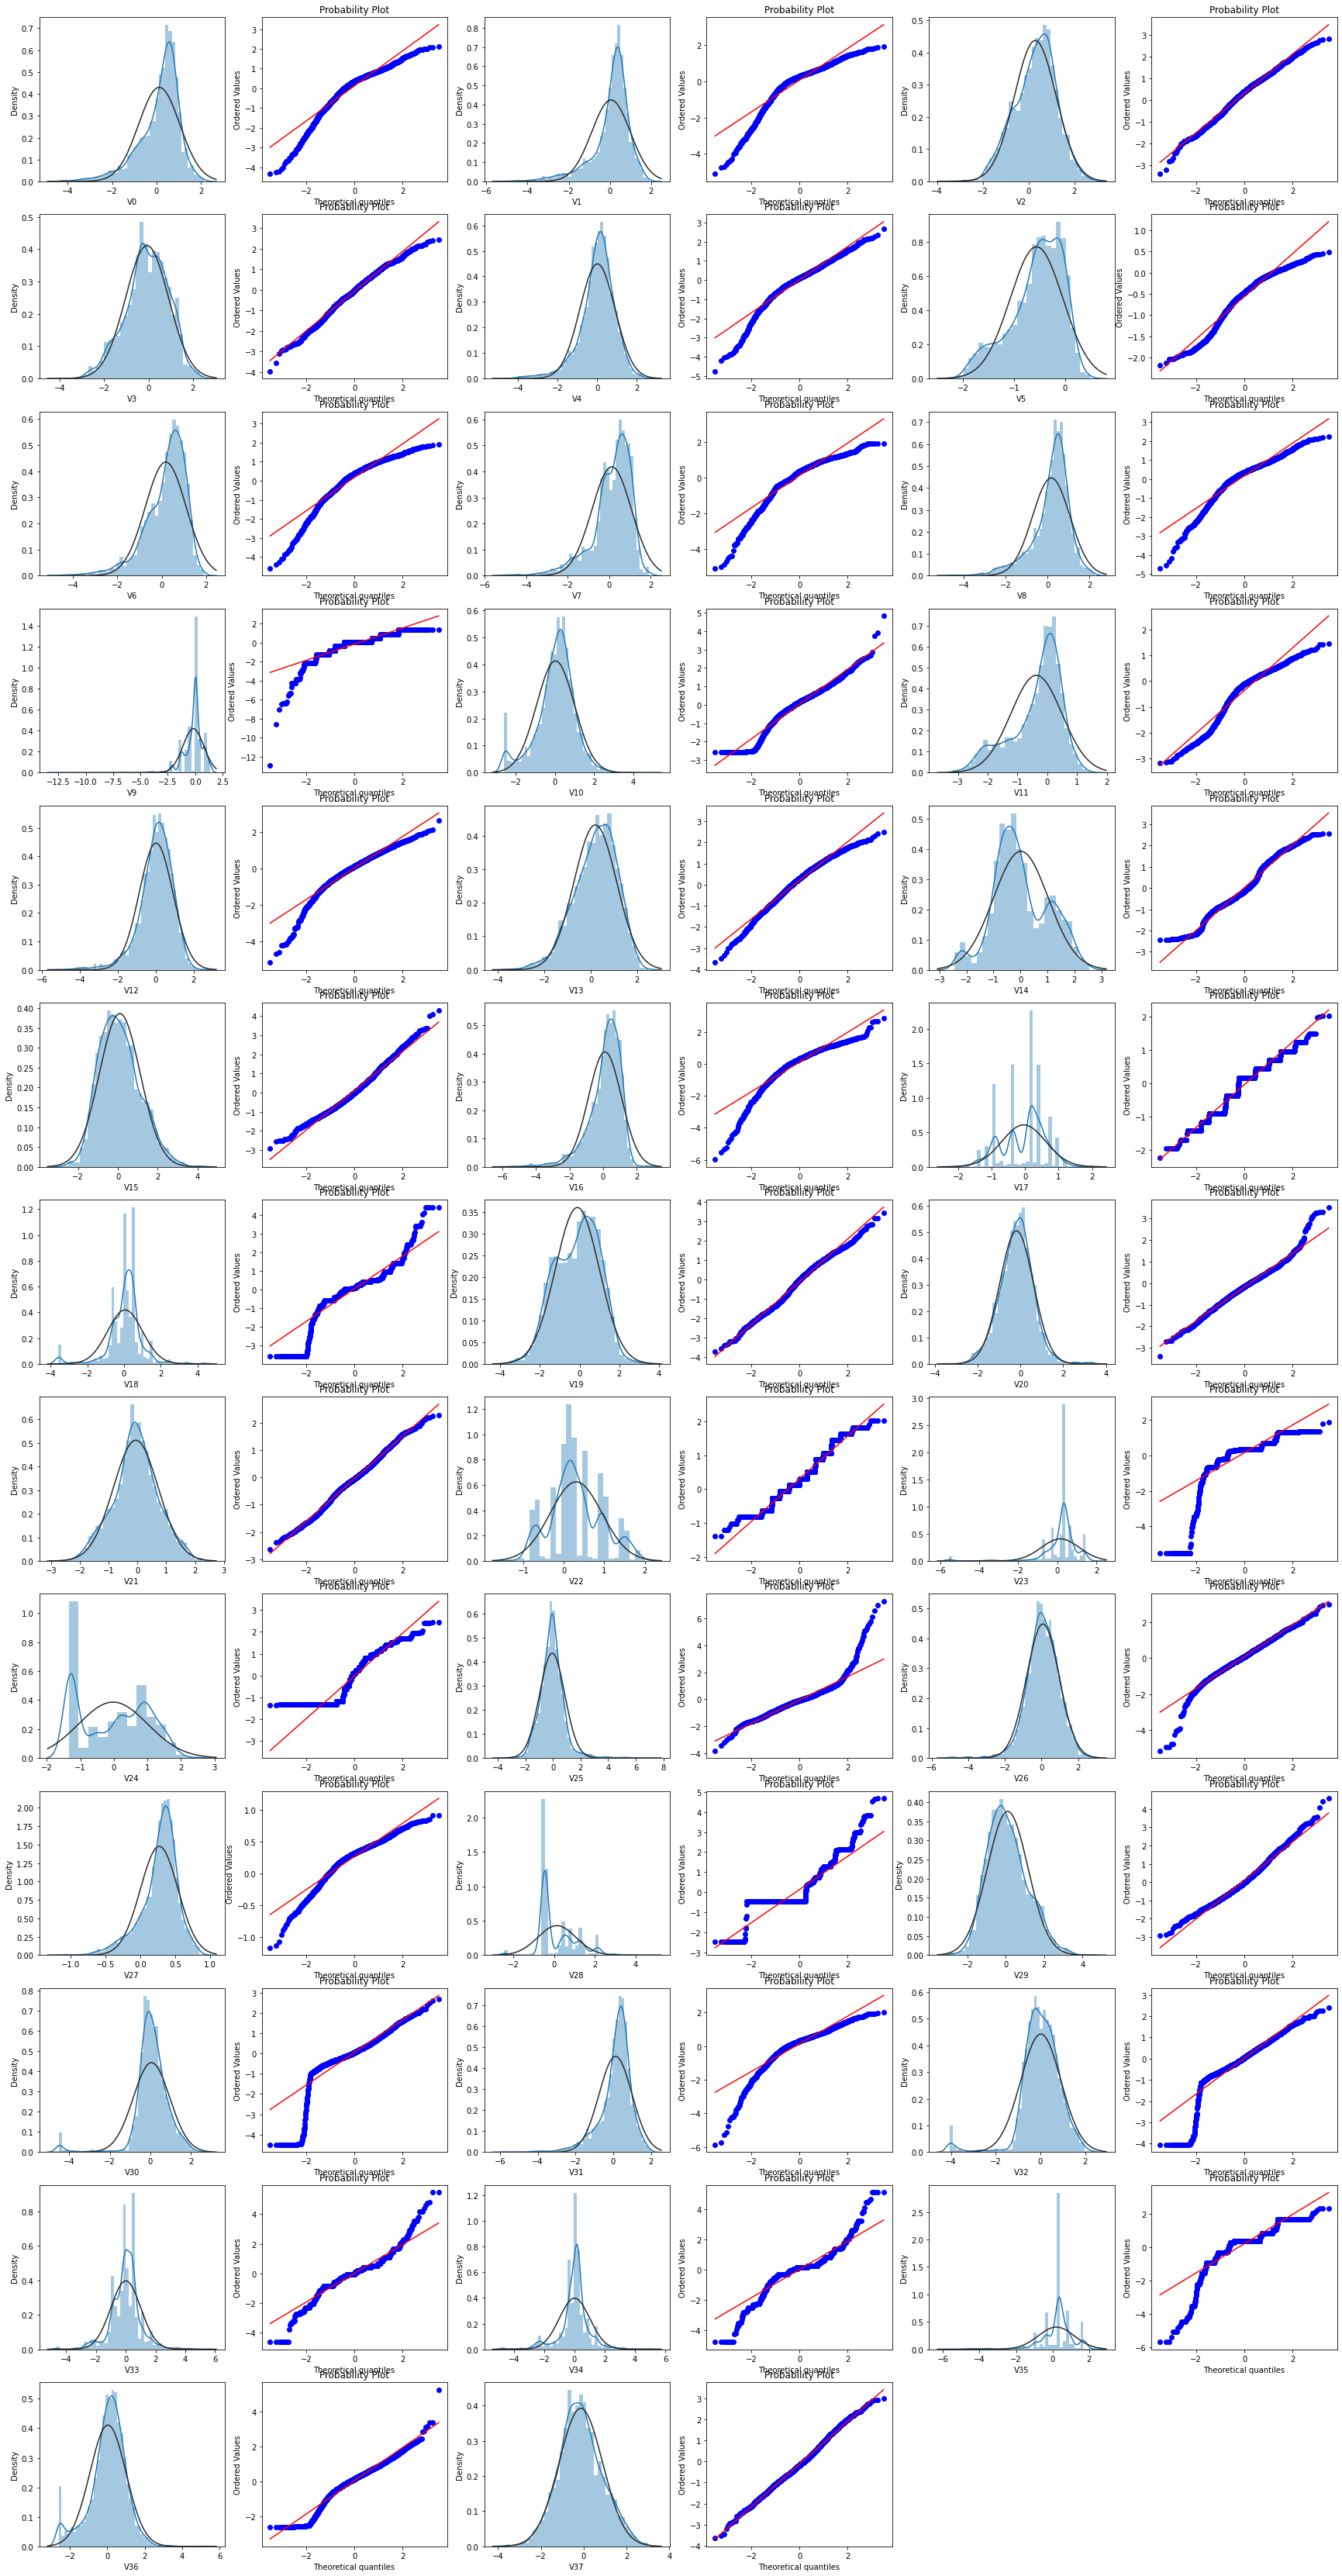

In [25]:
fig3 = plt.figure(figsize=(30,60))
for i in range(38):
    plt.subplot(13,6,2*i+1)
    sn.distplot(train_data[f'V{i}'],fit=stats.norm)  
    plt.subplot(13,6,2*i+2)
    stats.probplot(train_data[f'V{i}'],plot=plt)    #横坐标是与实际的值，纵坐标是满足正态分布情况下预期的值
fig3.show()

#可以看到7,9,17,18,23,24,35与正态分布偏差较大

#### 3、KDE图

C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(train_data[f'V{i}'],color='Red',shade=True)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(test_data[f'V{i}'],color='Blue',shade=True)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(train_data[f'V{i}'],color='Red',shade=True)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`

C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(train_data[f'V{i}'],color='Red',shade=True)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(test_data[f'V{i}'],color='Blue',shade=True)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(train_data[f'V{i}'],color='Red',shade=True)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`

C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(train_data[f'V{i}'],color='Red',shade=True)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(test_data[f'V{i}'],color='Blue',shade=True)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn.kdeplot(train_data[f'V{i}'],color='Red',shade=True)
C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2828994700.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`

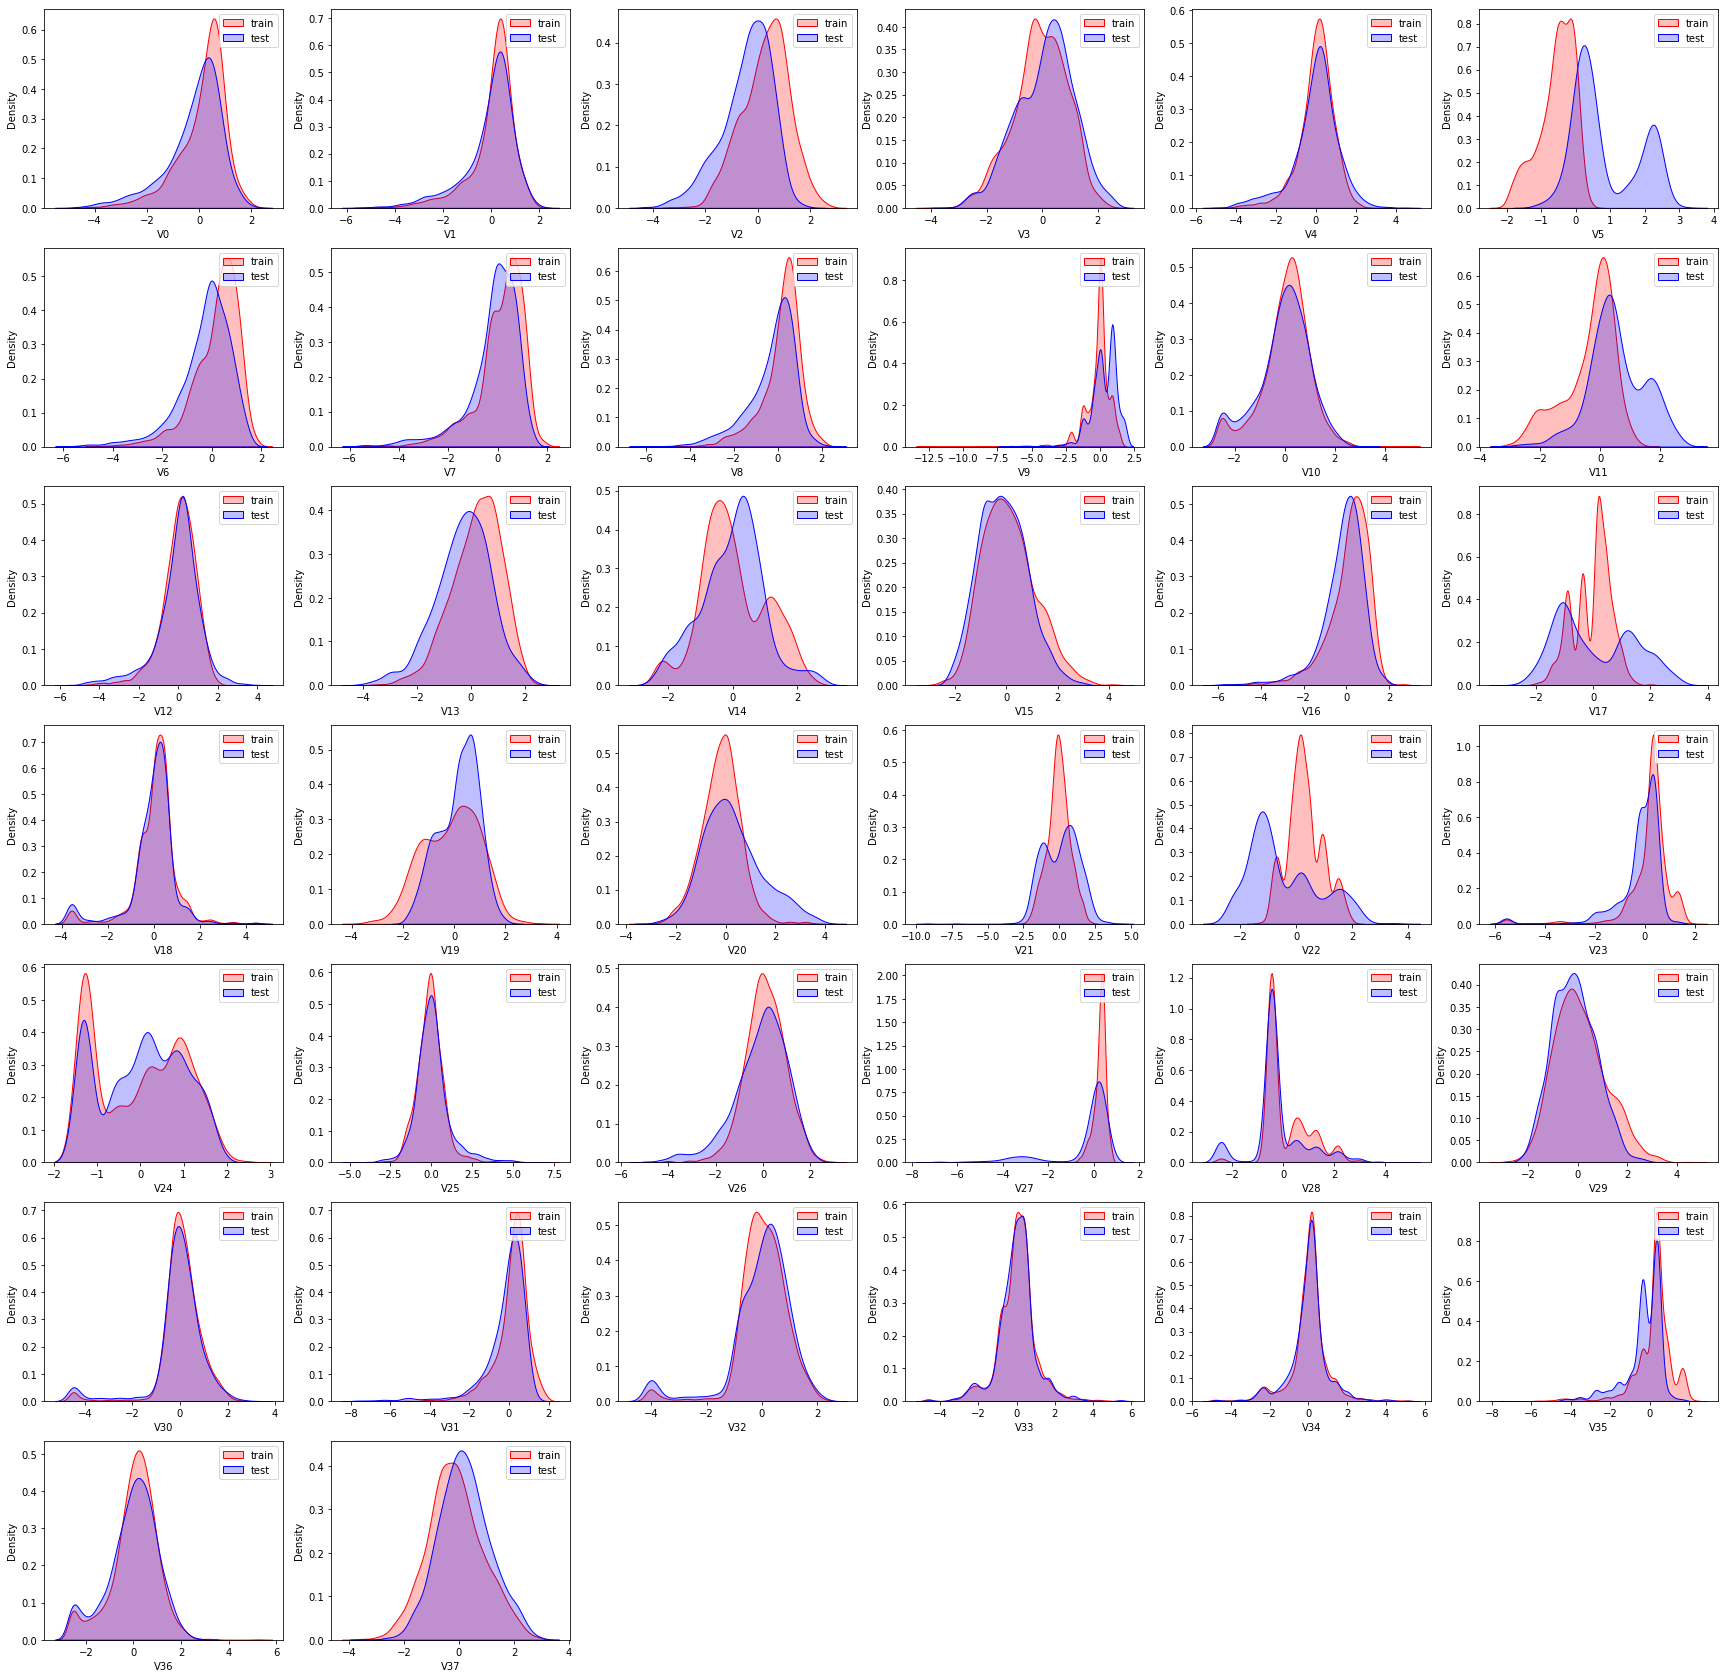

In [28]:
fig4 = plt.figure(figsize=(30,30))
for i in range(38):
    plt.subplot(7,6,i+1)
    sn.kdeplot(train_data[f'V{i}'],color='Red',shade=True)
    sn.kdeplot(test_data[f'V{i}'],color='Blue',shade=True)
    plt.legend(['train','test'])
fig4.show()

#可以看到V5、9、11、17、22、27偏差较大，可能需要从训练集中去掉这些特征

#### 4.1特征与target回归关系

C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/2479266142.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig5.show()


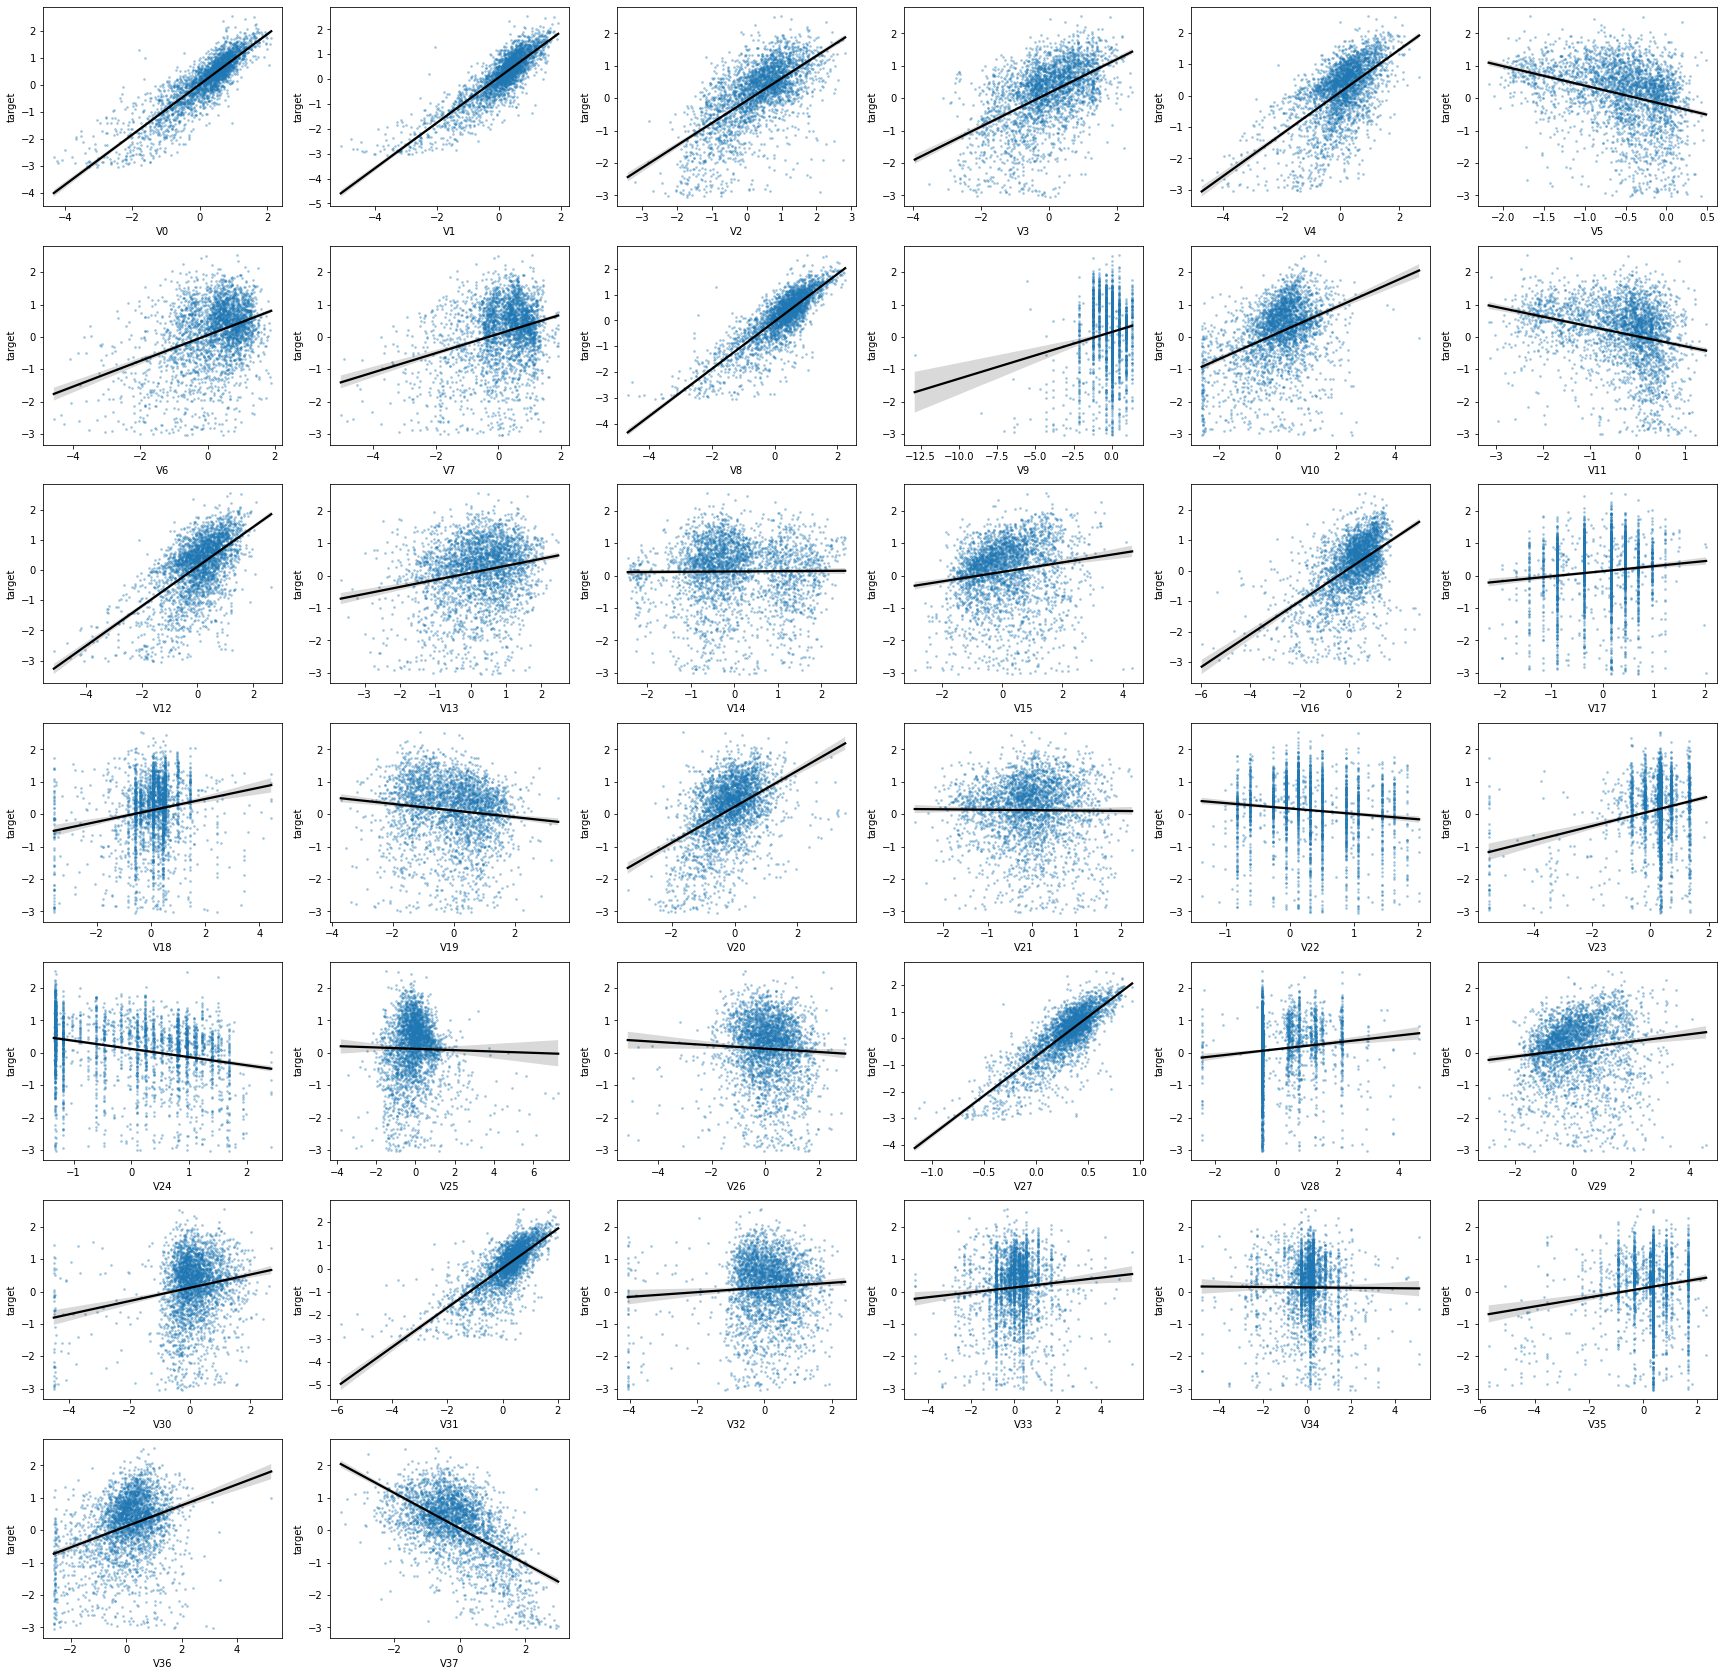

In [38]:
fig5 = plt.figure(figsize=(30,30))
for i in range(38):
    plt.subplot(7,6,i+1)
    sn.regplot(x=f'V{i}',y='target',data=train_data,line_kws={'color':'k'},scatter_kws={'s':3,'alpha':0.3})
fig5.show()

#可以看到V5、6、7、9、13、14、17、18、22、23、24、28、33、34、35和target的线性关系不明显

#### 4.2特征好和target的相关性（热力图）

C:\Users\Administrator\AppData\Local\Temp/ipykernel_21196/3627169620.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig6.show()


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,-0.327028,0.189267,0.141294,0.794013,0.077888,...,0.302145,0.156968,0.675003,0.050951,0.056439,-0.019342,0.138933,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,-0.227289,0.276805,0.205023,0.874650,0.138849,...,0.147096,0.175997,0.769745,0.085604,0.035129,-0.029115,0.146329,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,-0.322417,0.615938,0.477114,0.703431,0.047874,...,-0.275764,0.175943,0.653764,0.033942,0.050309,-0.025620,0.043648,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,-0.206307,0.233896,0.197836,0.411946,-0.063717,...,0.117610,0.043966,0.421954,-0.092423,-0.007159,-0.031898,0.080034,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,-0.233959,-0.117529,-0.052370,0.449542,-0.031816,...,0.659093,0.022807,0.447016,-0.026186,0.062367,0.028659,0.100010,0.113609,-0.031054,0.603984
V5,-0.327028,-0.227289,-0.322417,-0.206307,-0.233959,1.000000,-0.028995,0.081069,-0.182281,0.038810,...,-0.175836,-0.074214,-0.121290,-0.061886,-0.132727,-0.105801,-0.075191,0.026596,0.404799,-0.314676
V6,0.189267,0.276805,0.615938,0.233896,-0.117529,-0.028995,1.000000,0.917502,0.468233,0.450096,...,-0.467980,0.188907,0.546535,0.144550,0.054210,-0.002914,0.044992,0.433804,-0.404817,0.370037
V7,0.141294,0.205023,0.477114,0.197836,-0.052370,0.081069,0.917502,1.000000,0.389987,0.446611,...,-0.311363,0.170113,0.475254,0.122707,0.034508,-0.019103,0.111166,0.340479,-0.292285,0.287815
V8,0.794013,0.874650,0.703431,0.411946,0.449542,-0.182281,0.468233,0.389987,1.000000,0.100672,...,-0.011091,0.150258,0.878072,0.038430,0.026843,-0.036297,0.179167,0.326586,-0.553121,0.831904
V9,0.077888,0.138849,0.047874,-0.063717,-0.031816,0.038810,0.450096,0.446611,0.100672,1.000000,...,-0.221623,0.293026,0.121712,0.289891,0.115655,0.094856,0.141703,0.129542,-0.112503,0.139704


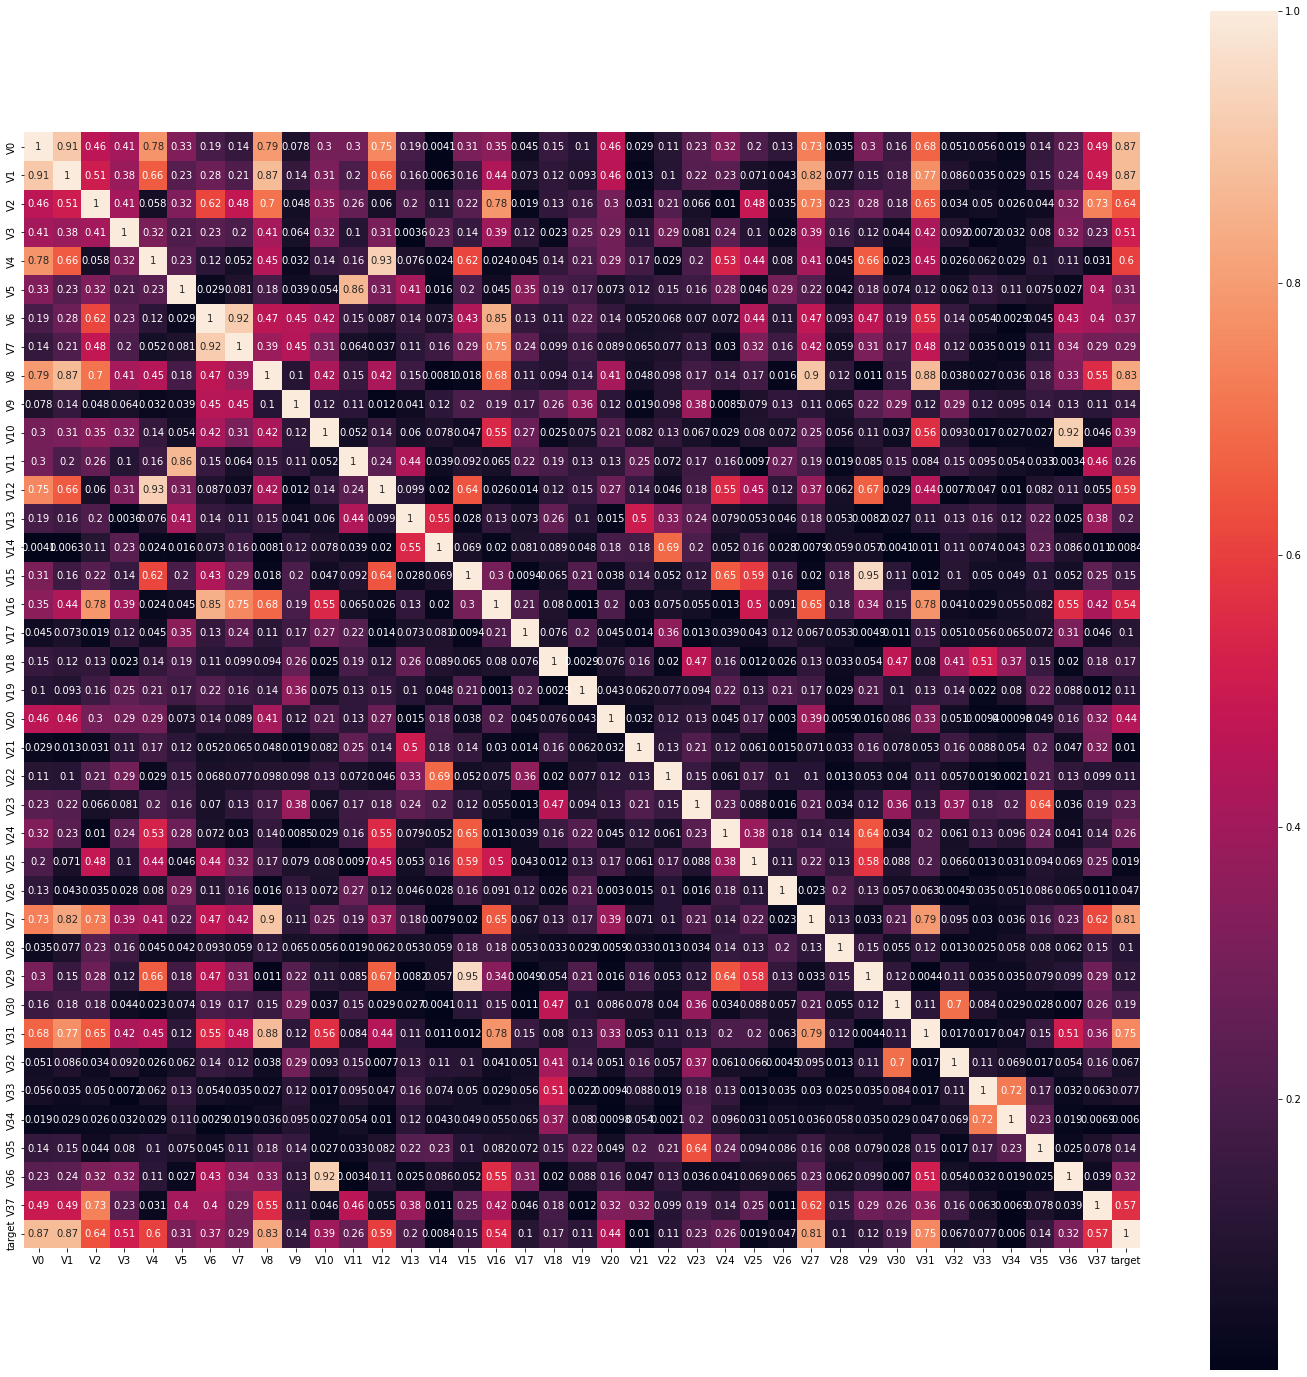

In [43]:
train_data_corr = train_data.corr()
fig6 = plt.figure(figsize=(25,25))
sn.heatmap(train_data_corr.abs(),annot=True,square=True)
fig6.show()
train_data_corr

In [62]:
#与target相关性小于0.1的特征基本上可以认为不相干，可以将其抽取出来

low_corr_feat_list = list(train_data.columns[train_data_corr['target'].abs()<0.1])
high_corr_feat_list = list(train_data.columns[train_data_corr['target'].abs()>0.1])
high_corr_feat_list.remove('target')  #remove会返回一个空值
print('low:\n',low_corr_feat_list)
print('high:\n',high_corr_feat_list)

low:
 ['V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34']
high:
 ['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V22', 'V23', 'V24', 'V27', 'V28', 'V29', 'V30', 'V31', 'V35', 'V36', 'V37']
